In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv


cpu_sizes = [0,1,2,4,6,8,12,16,24,32,64,128]

show_mean = True
show_med = True


In [2]:
def getMeanData(df,cpu,type):
    #filterd_df = (df [(df ['type'] == type) & (df ['cpu'] == cpu)])
    filterd_df = (df [(df ['cpu'] == cpu) & (df ['iterations'] != 0) & (df ['time'] >= 0) & (df ['time'] <= 200)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    med = filterd_df.median()
    return (min['time'],mean['time'],max['time'],med['time']),(min['iterations'],mean['iterations'],max['iterations'],med['iterations']) 

def getMeanFailureData(df,cpu,type):
    #filterd_df = (df [(df ['type'] == type) & (df ['cpu'] == cpu)])
    filterd_df = (df [(df ['cpu'] == cpu) & (df ['iterations'] != 0) & (df ['time'] < 0)])
    mean = filterd_df.mean()
    min = filterd_df.min()
    max = filterd_df.max()
    med = filterd_df.median()
    return (min['time'],mean['time'],max['time']),(min['iterations'],mean['iterations'],max['iterations']) 


def plot_data(data_mean,data_med,y_label = "",title = "",use_log_scale = True):
    fig, ax = plt.subplots(figsize=(20, 8))
    if use_log_scale:
        plt.xscale('log', base=2)
    else:
        plt.xscale('linear')
        # Plot time data
    #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
    if show_mean:
        ax.plot(data_mean[1],data_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
        for i in range(len(data_mean[1])):
            ax.text(data_mean[1][i], data_mean[0][i], f'({data_mean[1][i]}, {data_mean[0][i]:.4})', 
                    fontsize=8, color='green', ha='center', va='bottom', backgroundcolor='white')
    if show_med:
        ax.plot(data_med[1],data_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
        for i in range(len(data_med[1])):
            ax.text(data_med[1][i], data_med[0][i], f'({data_med[1][i]}, {data_med[0][i]:.4})', 
                    fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
    #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


    # Ustawienie skali logarytmicznej na osi X o podstawie 

    ax.set_xticks(data_mean[1])
    ax.set_title(title)
    ax.set_xlabel('liczba pracujących wątków')
    ax.set_ylabel(y_label)
    ax.legend(['Średnia','Mediana'])

    # for i, label in enumerate(labels):
    #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

    # Plot iterations data


    # Display the plot
    plt.grid()
    plt.tight_layout()
    plt.show()


In [3]:
df_multithread = pd.read_csv("DQN_multithreaded_with_HyperThreading.csv",header=0)
mean_data_for_one_agent_step = []
mean_data_for_failures = []
#mean_data_for_multiple_agent_step = []
for cpu in cpu_sizes:
  mean_data_for_one_agent_step.append((getMeanData(df_multithread,cpu,0),cpu))
  mean_data_for_failures.append((getMeanFailureData(df_multithread,cpu,0),cpu))

print(mean_data_for_one_agent_step)

[(((0.0102406, 17.502160149168976, 189.329, 8.060500000000001), (33.0, 219524.4182825485, 2406436.0, 103254.0)), 0), (((0.00869085, 25.62410822888112, 187.429, 13.2381), (25.0, 201677.16643356642, 1432477.0, 103908.0)), 1), (((0.0087493, 11.630746183032441, 169.398, 4.30739), (24.0, 86173.1706629055, 1298302.0, 33142.0)), 2), (((0.00425623, 7.900621193160113, 162.69, 3.669085), (21.0, 50600.51685393258, 1025030.0, 23090.0)), 4), (((0.00649656, 9.006551336305916, 135.676, 3.92448), (21.0, 34978.2987012987, 548897.0, 15573.0)), 6), (((0.00723529, 9.207440681263002, 167.908, 3.93803), (25.0, 25475.79791976226, 466552.0, 11280.0)), 8), (((0.0253786, 6.312479021925926, 109.838, 2.8328), (23.0, 17802.482962962964, 302260.0, 8344.0)), 12), (((0.00718629, 5.562124168926905, 144.401, 2.7455), (18.0, 13688.104199066875, 371474.0, 6791.0)), 16), (((0.00785868, 5.811873905614617, 165.642, 2.9751849999999997), (21.0, 9898.734219269103, 292635.0, 5010.0)), 24), (((0.0162217, 5.424924619542254, 93.33

# Prezentacja danych na wykresie 2D

* Ilość procesorów równa 0 - algorytm wykorzystuje uczenie sekwencyjne
* Ilość procesorów równa 1 - algorytm wykorzystuje uczenie wielowątkowe dla jednego wątku

### Średni czas uczenia i średnia ilość iteracji 

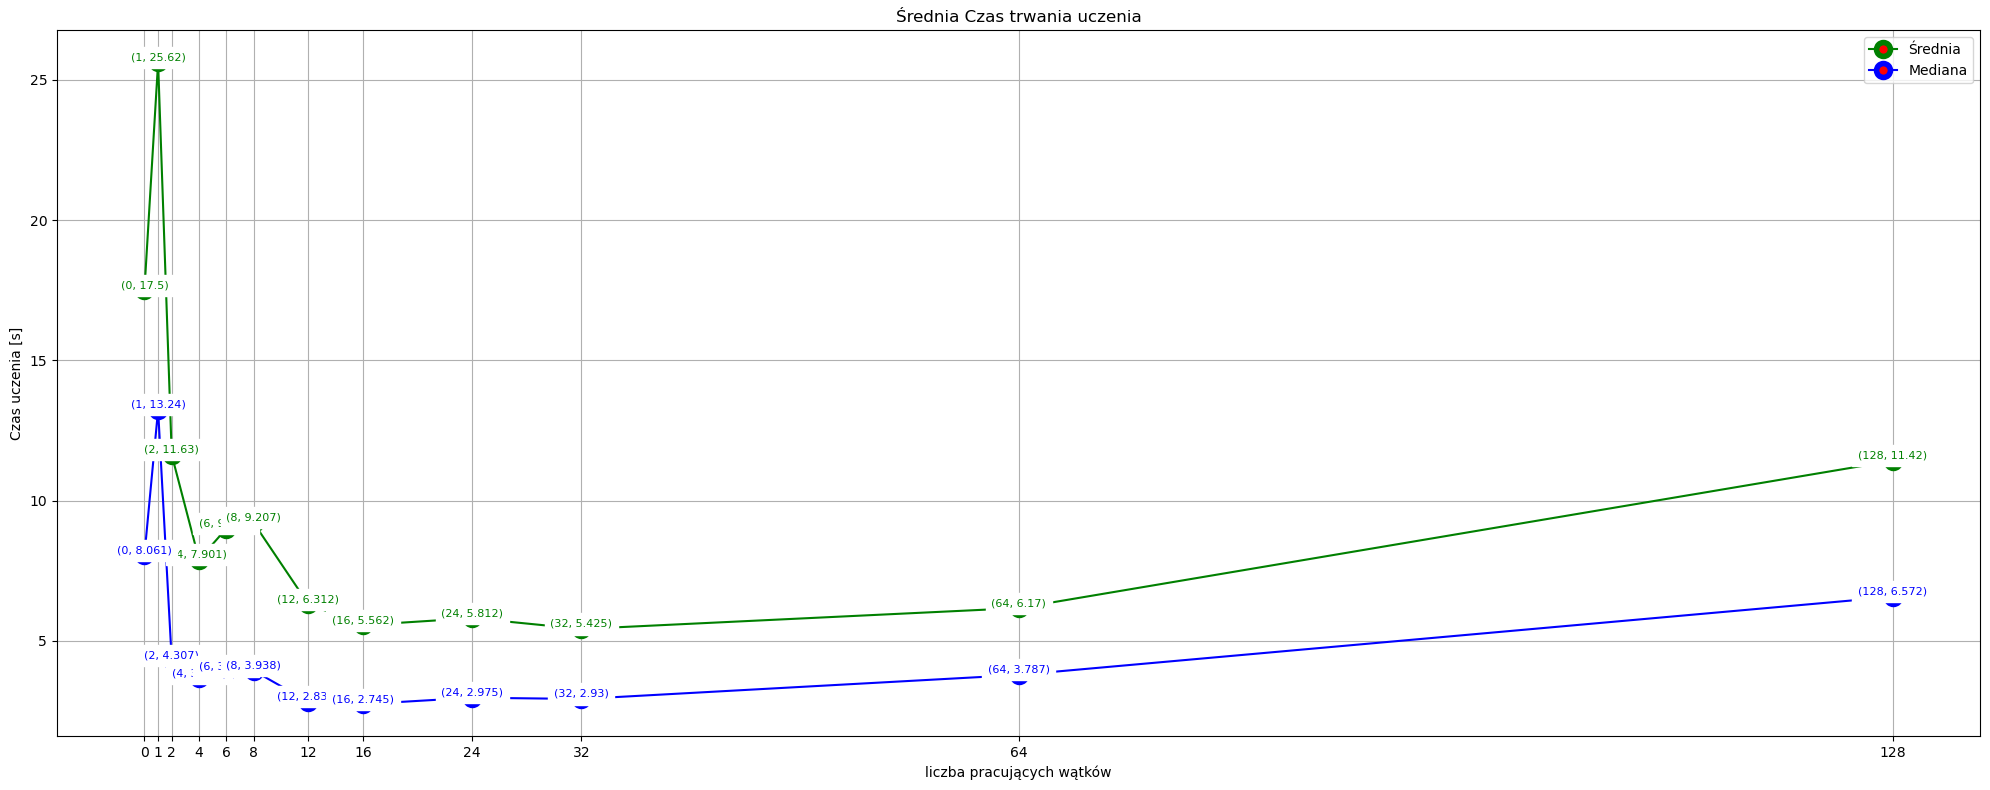

In [4]:
time_min = ([x[0][0][0] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for min value plot
time_mean = ([x[0][0][1] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
time_med = ([x[0][0][3] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
time_max = ([x[0][0][2] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for max value plot


plot_data(time_mean,time_med,"Czas uczenia [s]","Średnia Czas trwania uczenia",use_log_scale=False)

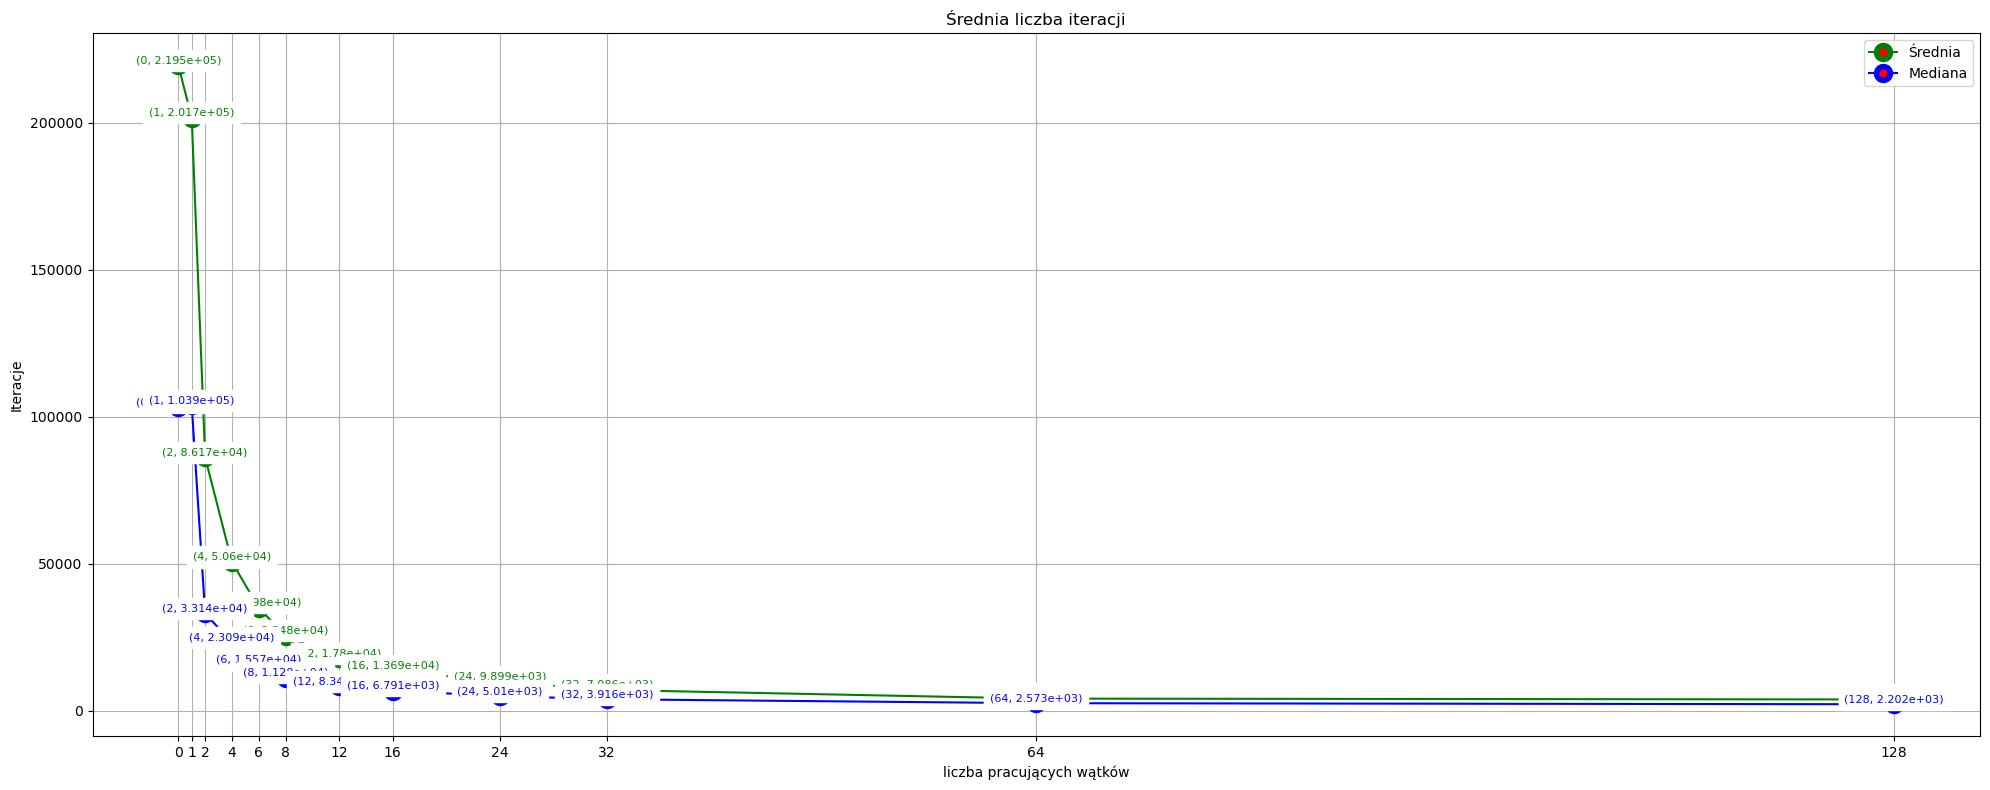

In [5]:
# Time data (min, mean, max)

iter_min = ([x[0][1][0] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for min value plot
iter_mean = ([x[0][1][1] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
iter_med = ([x[0][1][3] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] ) 
iter_max = ([x[0][1][2] for x in mean_data_for_one_agent_step], [x[1] for x in mean_data_for_one_agent_step] )  #uncoment for max value plot

plot_data(iter_mean,iter_med,'Iteracje','Średnia liczba iteracji',use_log_scale=False)

# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(iter_mean[1],iter_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(iter_mean[1][i], iter_mean[0][i] - 1, f'({iter_mean[1][i]}, {iter_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(iter_med[1],iter_med[0], label=str(time_min[0]), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)


# ax.set_xticks(time_mean[1])
# ax.set_title('Średnia liczba iteracji')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Iteracje')
# ax.legend(['Średnia','Mediana'])

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

### Przyśpieszenie i Efektywność silne

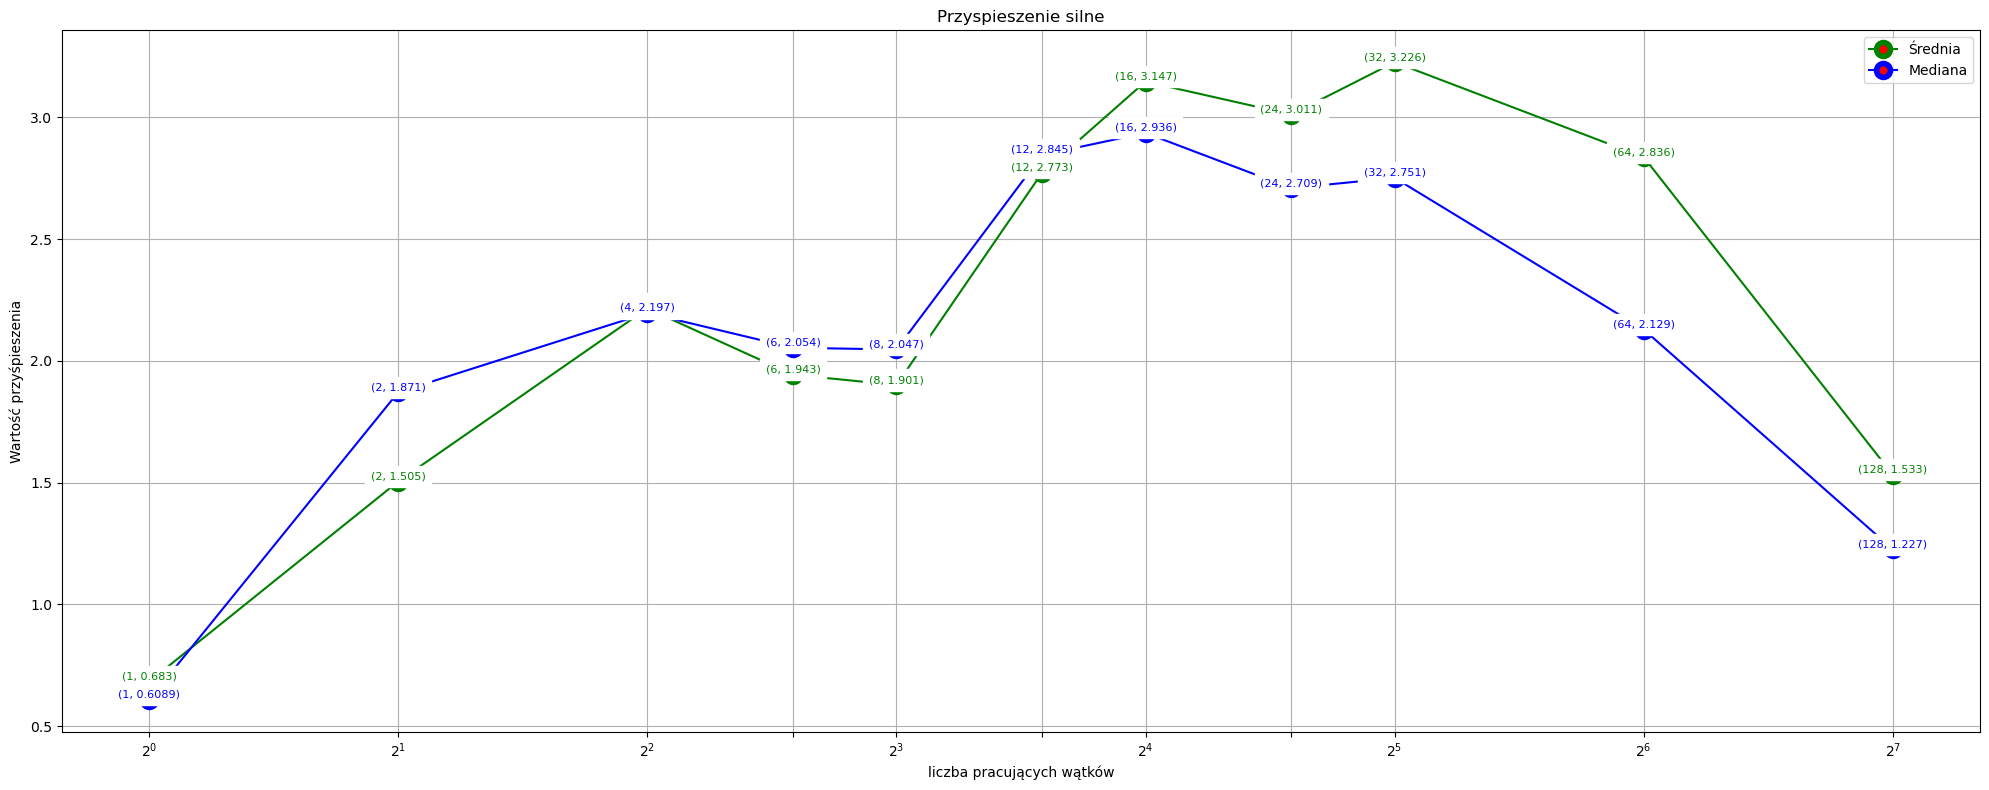

In [6]:
# Time data (min, mean, max)

# fig, ax = plt.subplots(figsize=(20, 8))
# dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([mean_data_for_one_agent_step[0][0][0][1]/x[0][0][1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[0][0][0][3]/x[0][0][3] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość przyśpieszenia','Przyspieszenie silne')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='green', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str(time_med[0]), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Przyspieszenie silne')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość przyśpieszenia')
# ax.legend(['Średnia','Mediana'])

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

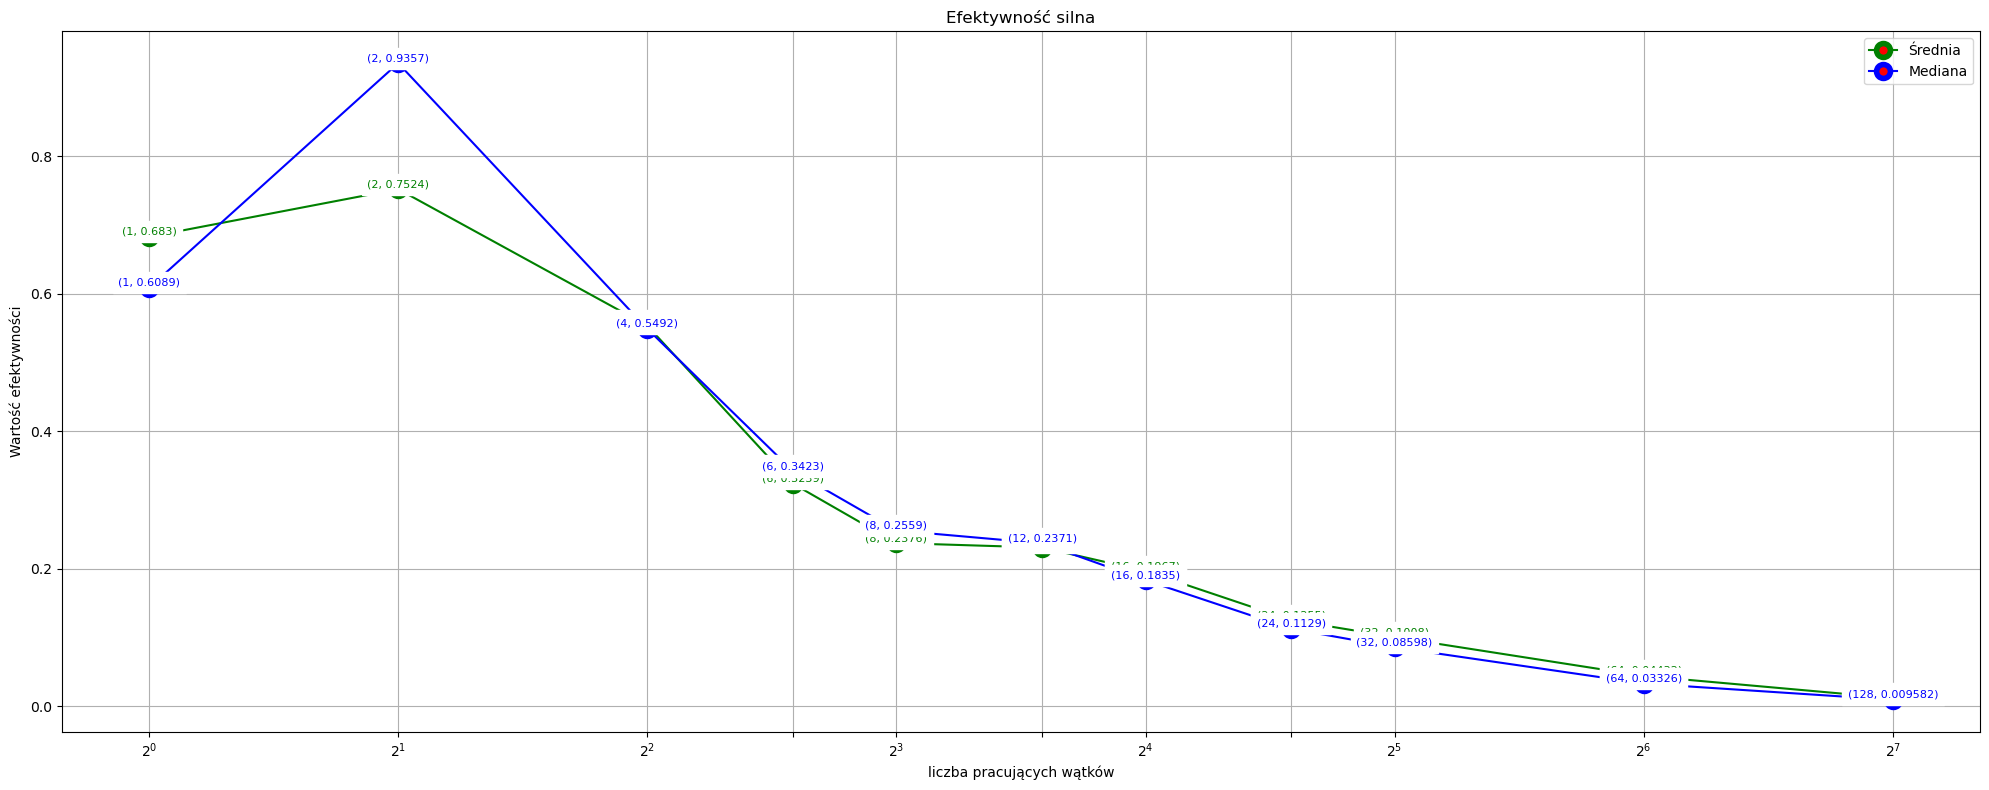

In [7]:
time_mean = ([mean_data_for_one_agent_step[0][0][0][1]/x[0][0][1]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[0][0][0][3]/x[0][0][3]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość efektywności','Efektywność silna')

# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label="Średnia", color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.03, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label="Mediana", color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Efektywność silna')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość efektywności')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

### Przyśpieszenie i Efektywność Słabe

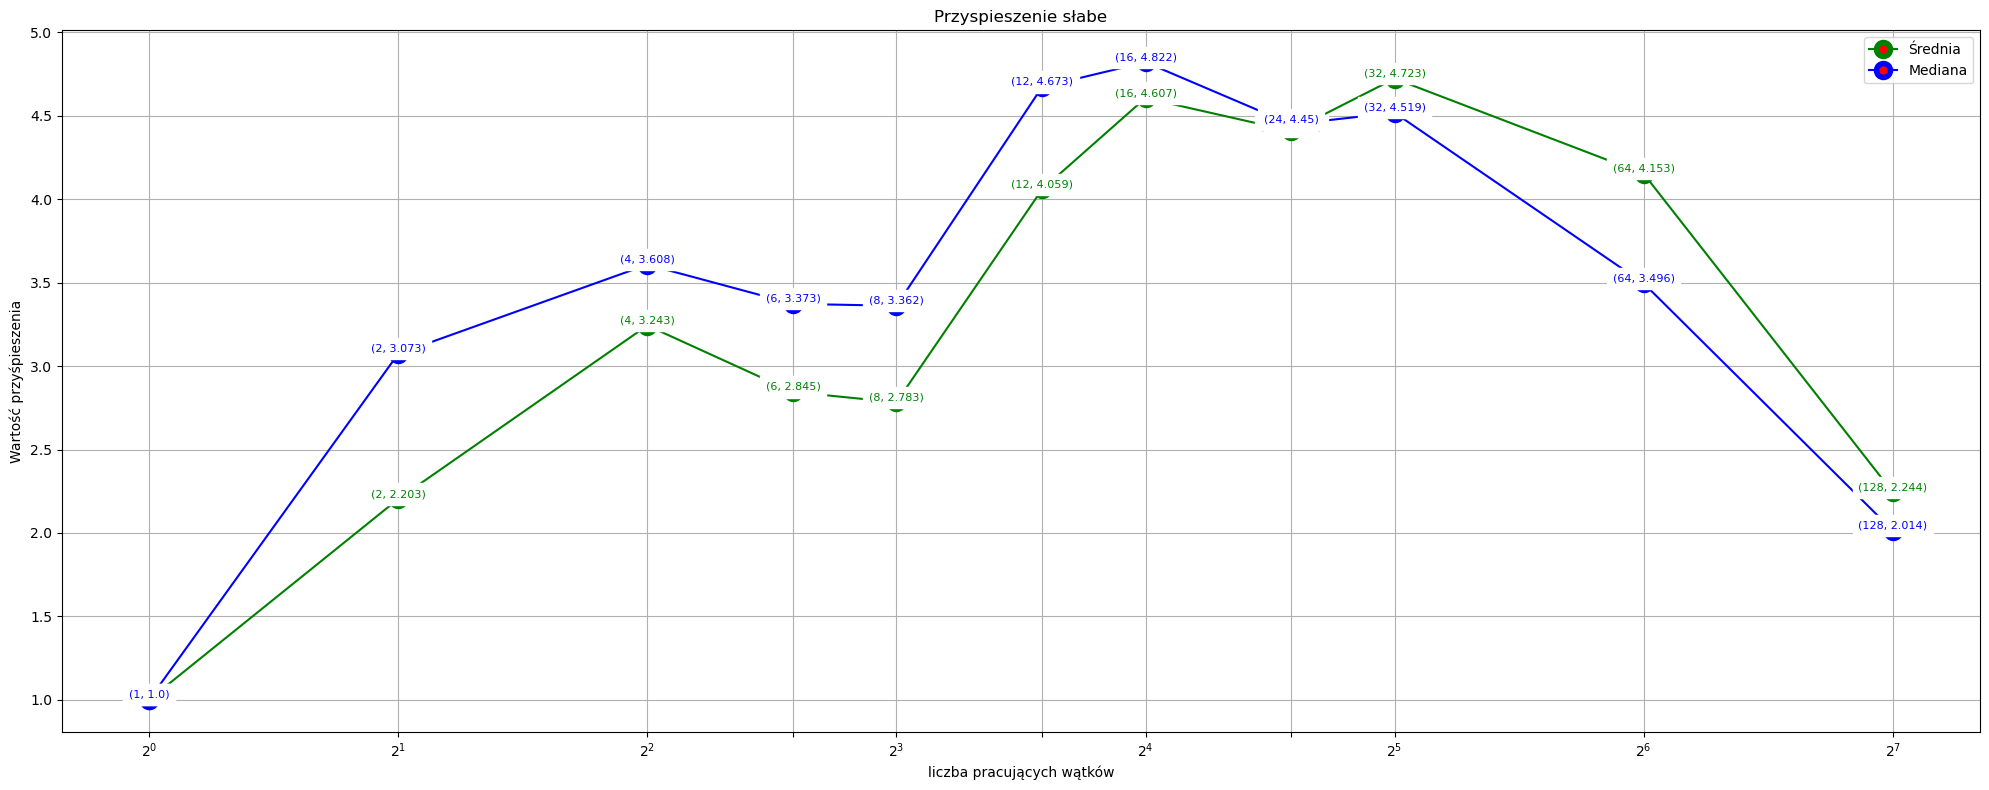

In [8]:
# # Time data (min, mean, max)

# fig, ax = plt.subplots(figsize=(20, 8))
# dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([mean_data_for_one_agent_step[1][0][0][1]/x[0][0][1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[1][0][0][3]/x[0][0][3] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość przyśpieszenia','Przyspieszenie słabe')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
# #ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Przyspieszenie słabe')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość przyśpieszenia')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

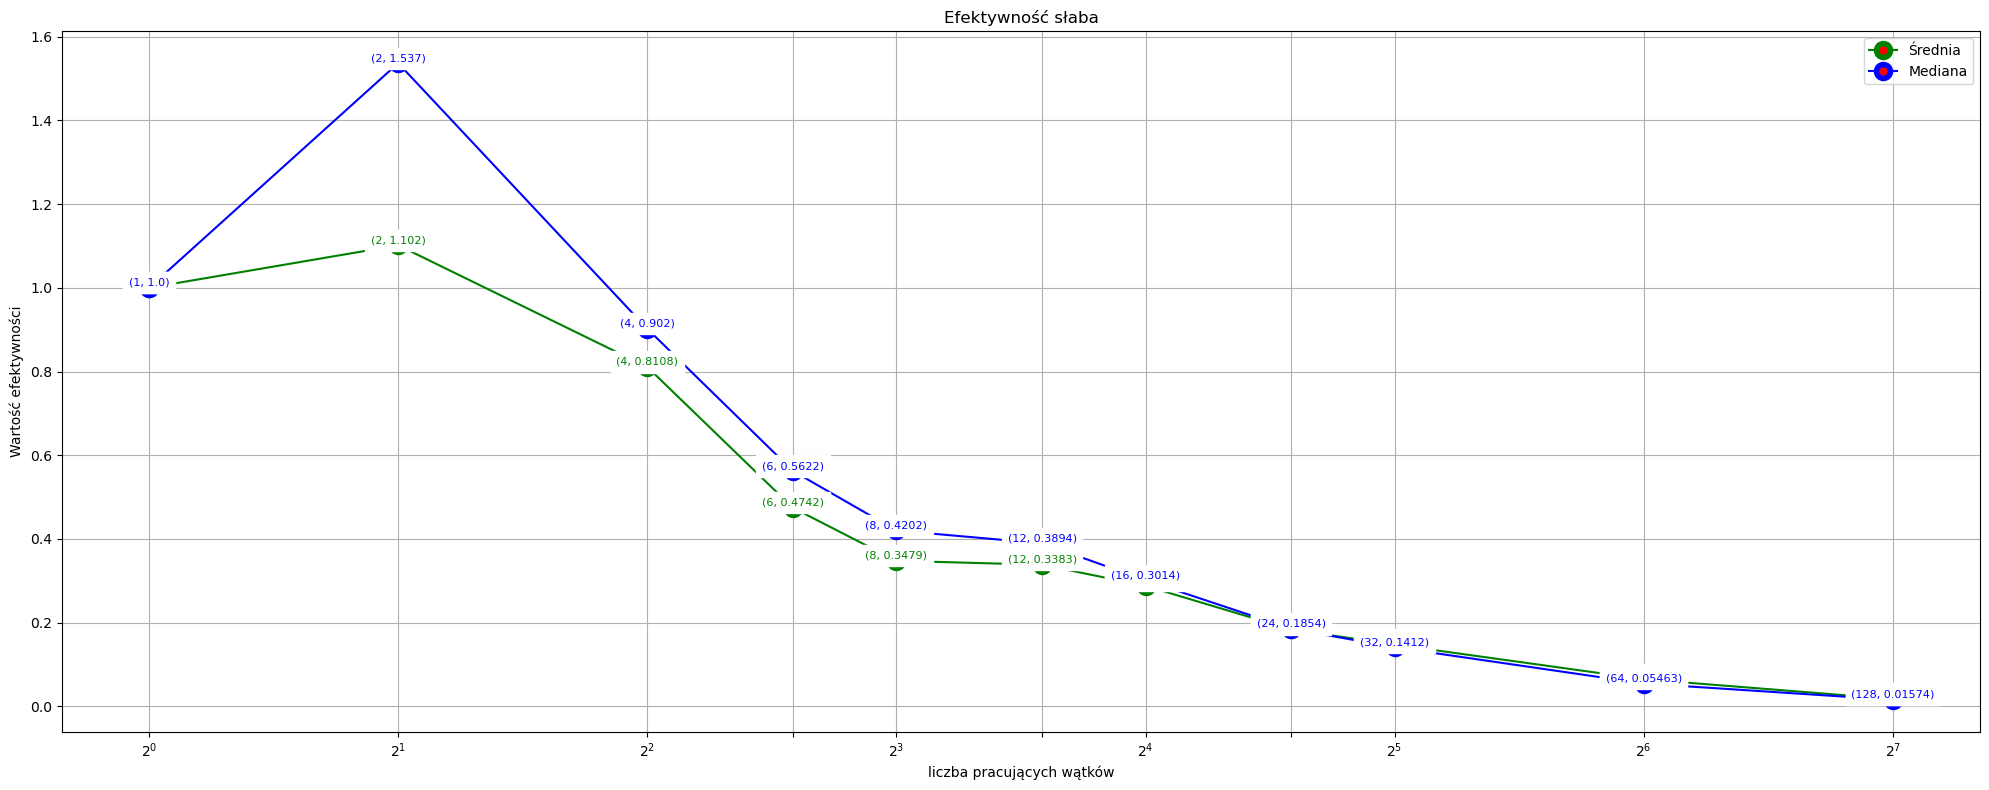

In [9]:
# Time data (min, mean, max)

time_mean = ([mean_data_for_one_agent_step[1][0][0][1]/x[0][0][1]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 
time_med = ([mean_data_for_one_agent_step[1][0][0][3]/x[0][0][3]/x[1] for x in mean_data_for_one_agent_step[1:]], [x[1] for x in mean_data_for_one_agent_step[1:]] ) 

plot_data(time_mean,time_med,'Wartość efektywności','Efektywność słaba')
# # Plot time data
# #ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
# if show_mean:
#     ax.plot(time_mean[1],time_mean[0], label=str("Średnia"), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#     for i in range(len(time_mean[1])):
#         ax.text(time_mean[1][i], time_mean[0][i] - 0.1, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
#                 fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')
# if show_med:
#     ax.plot(time_med[1],time_med[0], label=str("Mediana"), color='blue', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)


# # Ustawienie skali logarytmicznej na osi X o podstawie 2
# plt.xscale('log', base=2)

# ax.set_xticks(time_mean[1])
# ax.set_title('Efektywność słaba')
# ax.set_xlabel('liczba pracujących wątków')
# ax.set_ylabel('Wartość efektywności')
# ax.legend()

# # for i, label in enumerate(labels):
# #     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# # Plot iterations data


# # Display the plot
# plt.grid()
# plt.tight_layout()
# plt.show()

# Histogram Danych 

[1.39678  0.266852 0.612451 ... 0.793726 2.78876  4.63494 ]


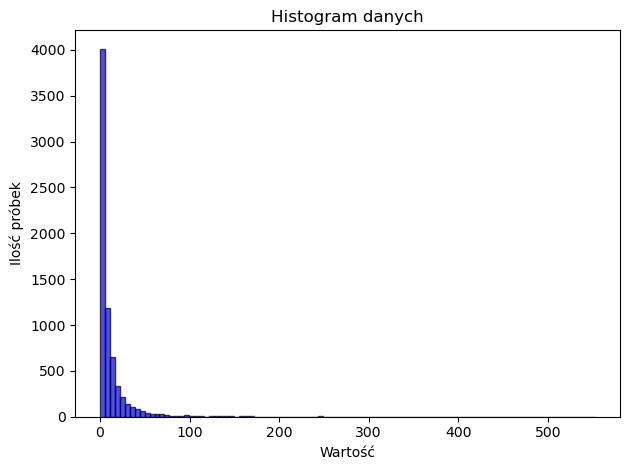

In [10]:
filterd_df = (df_multithread [(df_multithread ['iterations'] != 0) & (df_multithread ['time'] > 0) & (df_multithread ['time'] < 9999) ])
print(filterd_df["time"].values)
times_data = filterd_df["time"].values
plt.hist(times_data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram danych')
plt.xlabel('Wartość')
plt.ylabel('Ilość próbek')

# Display the plot
plt.tight_layout()
plt.show()

# Analiza czasu wypełnienia 

In [ ]:
df_t = pd.read_csv("wb_data/threadsTime.csv")
df_m = pd.read_csv("wb_data/DQN_multithreaded.csv")
 
def getTotalExecTime(df,cpu):
    filterd_df = (df [(df ['cpu'] == cpu)])
    sum_time = filterd_df.sum()
    return (sum_time['time'])

def policz_procenty_wypelnienia(df,cpu):
    filterd_df = (df [(df ['cpu'] == cpu)])
    sum_time = filterd_df.sum()
    return sum_time['main_time'],sum_time['threads_time']

cpu_sizes = [1,2,4,6,8,12,16,24,32,64,128]
data_samples = []
for cpu_v in cpu_sizes:
    data_samples.append((cpu_v,policz_procenty_wypelnienia(df_t,cpu_v),getTotalExecTime(df_m,cpu_v)*1e6))



[(1, (232135.44800000003, 303507.156), 641782.0), (2, (220675.55899999998, 395943.98199999996), 712521.0), (4, (12909608.565999996, 35774211.221), 54439600.0), (6, (8590957.08, 33906236.09199999), 46622300.0), (8, (754657.071, 3947638.432), 5074780.0), (12, (7396198.252999999, 57000859.00600001), 69940500.0), (16, (175239.549, 1693126.8599999999), 2041010.0), (24, (164986.946, 2250391.152), 2624390.0), (32, (541730.556, 8767653.943), 9964010.0), (64, (170322.081, 4918843.597999999), 5421530.0), (128, (1126877.9759999998, 51596515.385), 55616200.0)]


([0.4729131636599344, 0.5556944735663931, 0.6571358206342442, 0.7272536123700459, 0.7778935110487548, 0.8149907279187311, 0.8295534367788496, 0.8574911320344918, 0.8799322705416796, 0.907279605203697, 0.9277245727863463], [1, 2, 4, 6, 8, 12, 16, 24, 32, 64, 128])


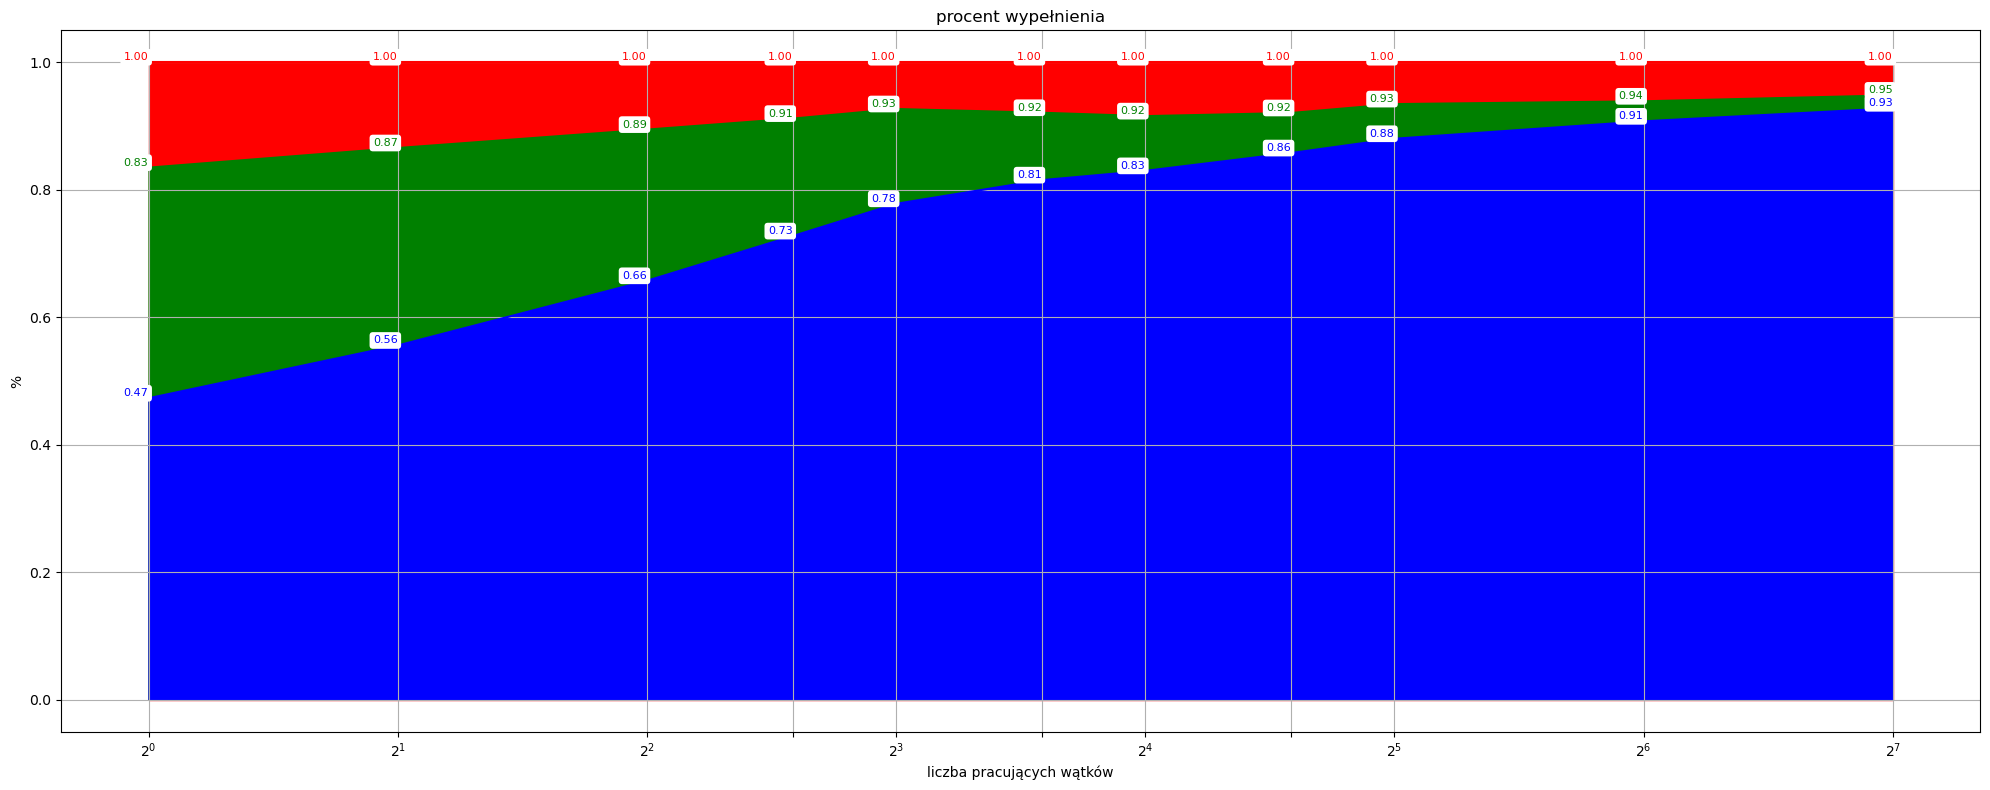

In [ ]:

fig, ax = plt.subplots(figsize=(20, 8))
plt.xscale('log', base=2)

amd_data = ([],[])#1 chemy % wypełnienia przez thready
for sample in data_samples:
    amd_data[0].append(sample[1][1]/sample[2])
    amd_data[1].append(sample[0])
amd_data2 = ([],[])#1 chemy % wypełnienia przez thready + main
for sample in data_samples:
    amd_data2[0].append((sample[1][1]+sample[1][0])/sample[2])
    amd_data2[1].append(sample[0])
amd_data3 = ([],[])#1 chemy % wypełnienia przez thready + main
for sample in data_samples:
    amd_data3[0].append(1)
    amd_data3[1].append(sample[0])


print(amd_data)

# Plot the three curves
ax.plot(amd_data3[1], amd_data3[0], label="czas zajęty przez cały program", color='red', linestyle='-')
ax.plot(amd_data2[1], amd_data2[0], label="czas zajęty przez wątki + część sekwencyjną", color='green', linestyle='-')
ax.plot(amd_data[1], amd_data[0], label="czas zajęty przez wątki", color='blue', linestyle='-')

# Fill the areas under each curve
ax.fill_between(amd_data3[1], amd_data3[0], color='red', alpha=1)
ax.fill_between(amd_data2[1], amd_data2[0], color='green', alpha=1)
ax.fill_between(amd_data[1], amd_data[0], color='blue', alpha=1)


# Add text labels with the y-value at each data point, with a white background

for i in range(len(amd_data2[1])):
    ax.text(amd_data2[1][i], amd_data2[0][i], f'+{(amd_data2[0][i] -amd_data[0][i]):.2f}', fontsize=8, color='green', ha='right', va='bottom', 
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

for i in range(len(amd_data[1])):
    ax.text(amd_data[1][i], amd_data[0][i], f'{amd_data[0][i]:.2f}', fontsize=8, color='blue', ha='right', va='bottom', 
            bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))


# for i in range(len(amd_data2[1])):
#     ax.text(amd_data2[1][i], amd_data2[0][i], f'{amd_data2[0][i]:.2f}', fontsize=8, color='green', ha='right', va='bottom')

# for i in range(len(amd_data[1])):
#     ax.text(amd_data[1][i], amd_data[0][i], f'{amd_data[0][i]:.2f}', fontsize=8, color='blue', ha='right', va='bottom')
# for i in range(len(amd_data[1])):
#     ax.text(amd_data[1][i], amd_data[0][i], f'({amd_data[1][i]}, {amd_data[0][i]:.4})', 
#             fontsize=8, color='red', ha='center', va='bottom', backgroundcolor='black')

# Ustawienie skali logarytmicznej na osi X o podstawie 

ax.set_xticks(amd_data[1])
ax.set_title("procent wypełnienia")
ax.set_xlabel('liczba pracujących wątków')
ax.set_ylabel("%")

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()


# plot_data_with_amd()

# Analiza porażek w uczeniu

Poniższe wykresu pokazują ile średnio trwała nieudana próba uczenia. Wykres nie ma głębszej interpretacji.

([-268.2205894736842, -492.38033333333334, -458.6435, -917.14, -928.231, -503.242, -471.396, -552.496, -2771.163857142858, -3431.2119999999995, -6918.825], [1, 2, 4, 6, 8, 12, 16, 24, 32, 64, 128])


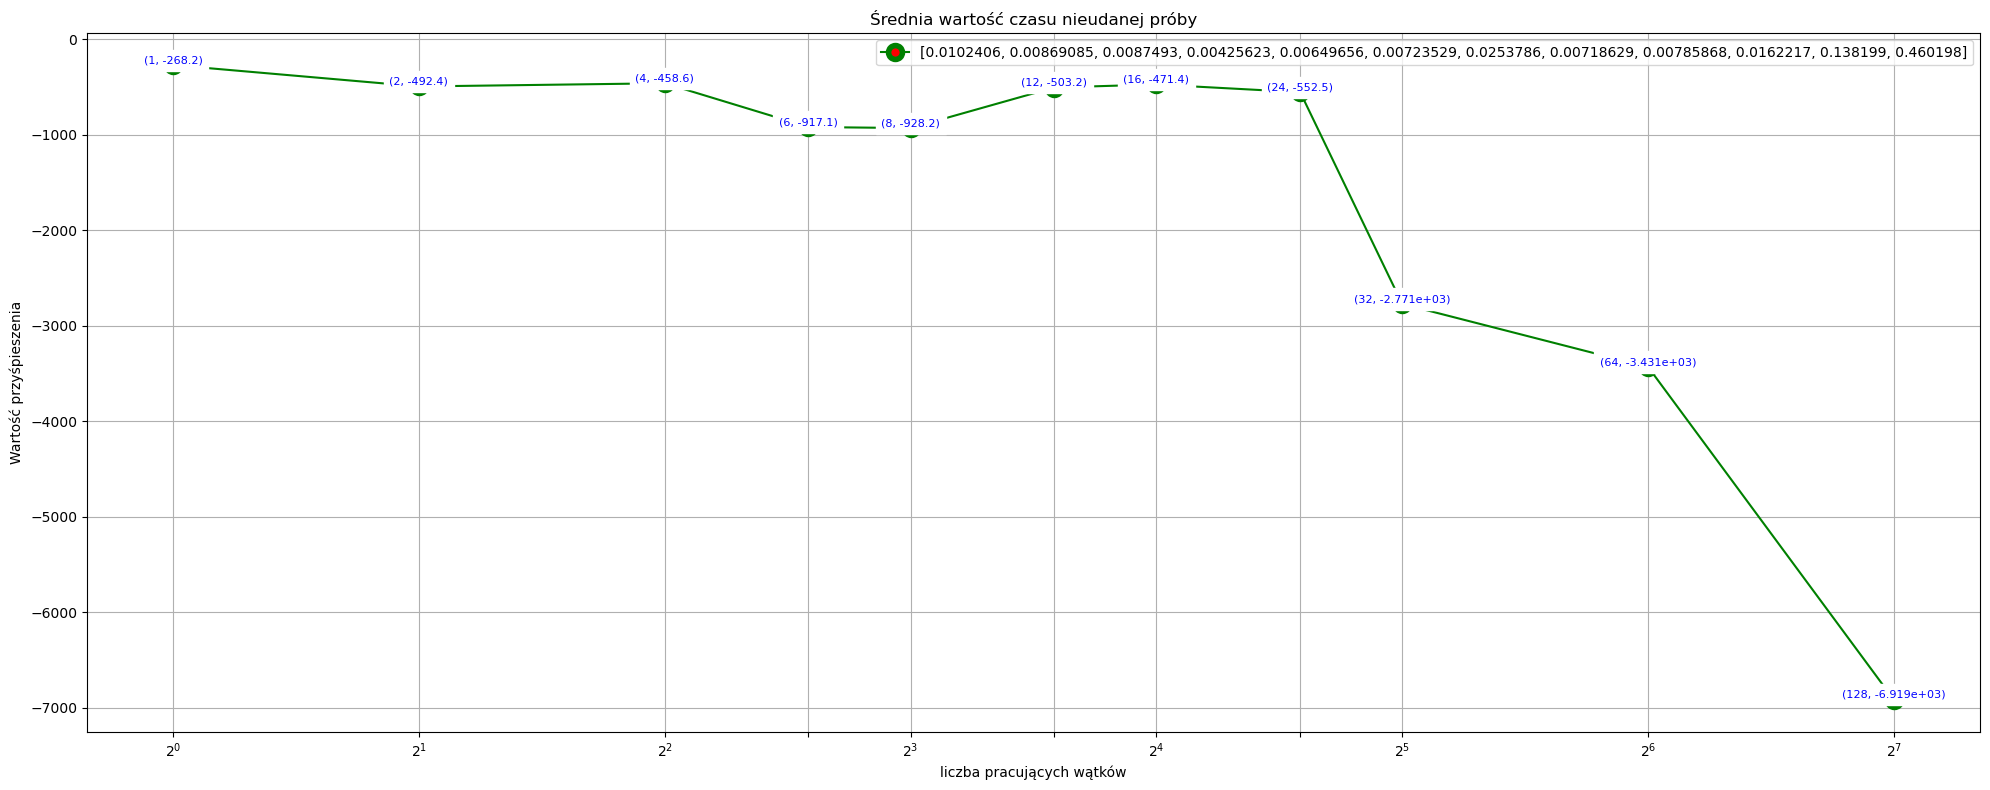

In [93]:
# Time data (min, mean, max)

fig, ax = plt.subplots(figsize=(20, 8))
dqn_types = [('blue', 'simple'), ('orange', 'memory'), ('green', 'target'), ('red', 'full')]

time_mean = ([x[0][0][1] for x in mean_data_for_failures[1:]], [x[1] for x in mean_data_for_failures[1:]] ) 
print(time_mean)
# Plot time data
#ax.plot(time_min[1],time_min[0], label=str(time_min[0]) + ' Min', color='blue', linestyle='--') #uncoment for min value plot
ax.plot(time_mean[1],time_mean[0], label=str(time_min[0]), color='green', linestyle='-',marker='o', markersize=10, markerfacecolor='red', markeredgewidth=4)
#ax.plot(time_max[1],time_max[0], label=str(time_min[0]) + ' Max', color='orange', linestyle=':') #uncoment for max value plot

# Annotating each data point with its value
for i in range(len(time_mean[1])):
    ax.text(time_mean[1][i], time_mean[0][i] - 0.2, f'({time_mean[1][i]}, {time_mean[0][i]:.4})', 
            fontsize=8, color='blue', ha='center', va='bottom', backgroundcolor='white')

# Ustawienie skali logarytmicznej na osi X o podstawie 2
plt.xscale('log', base=2)

ax.set_xticks(time_mean[1])
ax.set_title('Średnia wartość czasu nieudanej próby')
ax.set_xlabel('liczba pracujących wątków')
ax.set_ylabel('Wartość przyśpieszenia')
ax.legend()

# for i, label in enumerate(labels):
#     ax.text(x_values[i], y_values[i], label, fontsize=9, ha='right', va='bottom')

# Plot iterations data


# Display the plot
plt.grid()
plt.tight_layout()
plt.show()

Histogram czasów porażek

We wszystkich danych, nieudanych próbek wyszło: 89 / 7576 wszystkich próbek


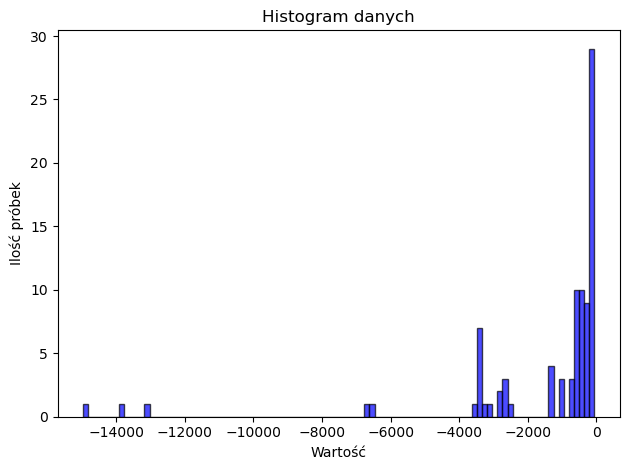

In [94]:
filterd_df = (df_multithread [(df_multithread ['iterations'] != 0) & (df_multithread ['time'] < 0) ])
print("We wszystkich danych, nieudanych próbek wyszło:",len(filterd_df.values),"/",len(df_multithread.values),"wszystkich próbek" )
times_data = filterd_df["time"].values
plt.hist(times_data, bins=100, color='blue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Histogram danych')
plt.xlabel('Wartość')
plt.ylabel('Ilość próbek')

# Display the plot
plt.tight_layout()
plt.show()